In [ ]:
import torch 
import torch.nn as nn
import torchvision 
import torchvision.transforms as transforms 
import matplotlib.pyplot as plt 
from datetime import datetime

In [ ]:
train_dataset = torchvision.datasets.FashionMNIST(root="./",download=True,train=True,transform=transforms.ToTensor())

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [ ]:
test_dataset = torchvision.datasets.FashionMNIST(root="./",download=False,train=False,transform=transforms.ToTensor())

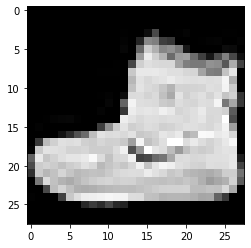

In [ ]:
plt.imshow(train_dataset.data[0],cmap="gray")

In [ ]:
num_classes = len(set(train_dataset.targets))

In [ ]:
num_classes

60000

In [ ]:
train_loaders = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=128,shuffle=True)

In [ ]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=128,shuffle=False)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv_layer = nn.Sequential(
        nn.Conv2d(in_channels=1,out_channels=32,kernel_size=3,stride=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=32,out_channels=64,kernel_size=3,stride=2),
        nn.ReLU(),
        nn.Conv2d(in_channels=64,out_channels=128,kernel_size=3,stride=2),
        nn.ReLU()
    )
    self.dence_layer = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(128*2*2,512),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(512,10)
    )
  def forward(self,x):
    out = self.conv_layer(x)
    out = out.view(out.size(0),-1)
    out = self.dence_layer(out)  
    return out

In [ ]:
model = CNN()

In [ ]:
criterian = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.001)

In [ ]:
num_ephos = 100
for ephos in range(num_ephos):
  for i,(images,labels) in enumerate(train_loaders):
    t0 = datetime.now()
    output = model(images)
    loss = criterian(output,labels)
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    dt = datetime.now()-t0
    if(i+1)%100 == 0:
      print(f"ephos{ephos+1}/{num_ephos}, loss{loss.item():.4f}")

ephos1/100, loss0.6378
ephos1/100, loss0.6099
ephos1/100, loss0.4879
ephos1/100, loss0.4949
ephos2/100, loss0.4377
ephos2/100, loss0.4126
ephos2/100, loss0.4696
ephos2/100, loss0.3426
ephos3/100, loss0.3294
ephos3/100, loss0.4145
ephos3/100, loss0.4514
ephos3/100, loss0.2445
ephos4/100, loss0.3020
ephos4/100, loss0.4109
ephos4/100, loss0.3327
ephos4/100, loss0.3303
ephos5/100, loss0.2500
ephos5/100, loss0.3283
ephos5/100, loss0.4455
ephos5/100, loss0.3051
ephos6/100, loss0.2407
ephos6/100, loss0.2301
ephos6/100, loss0.2353
ephos6/100, loss0.2258
ephos7/100, loss0.4228
ephos7/100, loss0.2601
ephos7/100, loss0.3376
ephos7/100, loss0.2011
ephos8/100, loss0.2712
ephos8/100, loss0.1942
ephos8/100, loss0.2988
ephos8/100, loss0.2310
ephos9/100, loss0.1917
ephos9/100, loss0.2108
ephos9/100, loss0.3327
ephos9/100, loss0.1598
ephos10/100, loss0.1350
ephos10/100, loss0.2219
ephos10/100, loss0.2586
ephos10/100, loss0.3107
ephos11/100, loss0.2468
ephos11/100, loss0.1885
ephos11/100, loss0.2861
epho

In [ ]:
n_correct = 0
n_sample = 0
with torch.no_grad():
  for i,(image,lab) in enumerate(train_loaders):
    output = model(image)
    _,predictions = torch.max(output,1)
    n_correct += (predictions==lab).sum().item()
    n_sample += lab.shape[0]

In [ ]:
acc = 100.0 * n_correct/n_sample
acc

98.84